# Load results

In [35]:
paper_dir = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/paper_results_xavier_uniform/'

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

data_name_dict = {
    'ade': 'ADE',
    'conll04': 'CoNLL04',
    'scierc': 'SciERC',
    'yamakata': 'ERFGC',
}

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 999)
# pd.set_option('display.max_rows', 999)

def load_results(walk_path: str):
    records = []
    no_config_dirs = []  # List to store directories with no config.json
    metric_list = ['tagger_results', 'parser_labeled_results', 'parser_unlabeled_results']
    file_list = []
    
    # First walk: collect all directories with config.json and leaf dirs without it
    for root, dirs, files in os.walk(walk_path):
        if 'config.json' in files:
            file_list.append(os.path.join(root, 'config.json'))
        else:
            # Check if this is a leaf directory (no subdirectories)
            if len(dirs) == 0 and root != walk_path:
                no_config_dirs.append(root)
    print(f'no_config_dirs: {no_config_dirs}')
    # Process directories with config.json
    for filename in tqdm(file_list, total=len(file_list)):
        try:
            config_dict = json.load(open(filename))
            benchmark_dict = json.load(open(filename.replace('config.json', 'test_results_benchmark.json')))
            
            try:
                params = benchmark_dict['learnable params']
            except:
                params = 0
                
            val_results = config_dict['val_results']
            test_results = config_dict['test_results']
            config = config_dict['config']
            
            for metric in metric_list:
                parser_rnn_type = config['parser_rnn_type']
                par_rnn_h = config['parser_rnn_hidden_size']
                records.append({
                    'metric': metric,
                    'val_prec': val_results[metric]['P'],
                    'val_recall': val_results[metric]['R'],
                    'val_f1': val_results[metric]['F1'],
                    'test_prec': test_results[metric]['P'],
                    'test_recall': test_results[metric]['R'],
                    'test_f1': test_results[metric]['F1'],
                    'name': config['model_name'],
                    'freeze_enc': 'FT' if config['freeze_encoder'] == 0 else 'frozen',
                    'params': round(params / 1e6, 2),
                    'data': config['dataset_name'],
                    'tag_emb_type': config['tag_embedding_type'],
                    # 'lora': 'LoRA' if config['use_lora'] == 1 else '/',
                    # 'tag_emb': config['use_tag_embeddings_in_parser'],
                    'tag_rnn': config['use_tagger_rnn'],
                    'par_rnn': parser_rnn_type.upper() if parser_rnn_type != 'none' else '/',
                    'par_rnn_l': config['parser_rnn_layers'],
                    'mlp_h': config['arc_representation_dim'],
                    'arc_norm': config['arc_norm'],
                    'par_rnn_h': par_rnn_h if par_rnn_h != 'none' else 0,
                    'par_type': config['parser_type'],
                    'par_gnn_layers': config['gnn_enc_layers'],
                    # 'par_res': config['parser_residual'],
                    'seed': config['seed'],
                    'training_steps': config['training_steps'],
                })
        except Exception as e:
            # If there's an error processing this config file, add its directory to no_config_dirs
            no_config_dirs.append(os.path.dirname(filename))
            print(f"Error processing {filename}: {e}")
    
    # Create DataFrame from all collected records
    df_aggregate = pd.DataFrame.from_records(records)
    
    # Return both the dataframe and the list of directories with no config.json
    return df_aggregate, no_config_dirs

/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/.env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# new results post May 3rd

In [2]:
walk_path = "/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000"
df, no_config_dirs = load_results(walk_path)
df = df[df['metric'] == 'parser_labeled_results']
df = df.sort_values(by=[
    'data',
    'tag_emb_type',
    'par_rnn_l',
    'mlp_h',
    'arc_norm',
    'test_f1',
    ])
print(df['seed'].value_counts())
print(df['freeze_enc'].value_counts())
df

no_config_dirs: ['/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--04:37:52_seed_1', '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--02:55:55_seed_0', '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/bert-base-uncased_2025-05-04--00:53:53_seed_4', '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_

  6%|▌         | 333/5753 [00:22<05:55, 15.27it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  6%|▌         | 340/5753 [00:23<06:19, 14.28it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  6%|▌         | 349/5753 [00:23<06:11, 14.55it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  7%|▋         | 388/5753 [00:26<05:30, 16.21it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  7%|▋         | 401/5753 [00:27<05:00, 17.82it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  7%|▋         | 410/5753 [00:27<05:13, 17.05it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  8%|▊         | 467/5753 [00:31<05:32, 15.90it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


  9%|▉         | 531/5753 [00:36<05:23, 16.16it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=conll04/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--11:44:20_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=conll04/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--11:44:20_seed_3/test_results_benchmark.json'


  9%|▉         | 539/5753 [00:36<05:02, 17.23it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=conll04/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--11:44:20_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l2_h400/data=conll04/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--11:44:20_seed_3/test_results_benchmark.json'


 40%|████      | 2315/5753 [02:45<03:34, 16.04it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:54:46_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:54:46_seed_4/test_results_benchmark.json'


 41%|████      | 2365/5753 [02:49<02:47, 20.26it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


 41%|████      | 2371/5753 [02:49<03:09, 17.85it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


 42%|████▏     | 2428/5753 [02:53<03:04, 18.00it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


 42%|████▏     | 2438/5753 [02:53<02:52, 19.18it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:48:45_seed_4/test_results_benchmark.json'


 91%|█████████▏| 5254/5753 [06:17<00:36, 13.50it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=scierc/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:19:30_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=scierc/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:19:30_seed_3/test_results_benchmark.json'


 91%|█████████▏| 5261/5753 [06:18<00:29, 16.80it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=scierc/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:19:30_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=scierc/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:19:30_seed_3/test_results_benchmark.json'


 92%|█████████▏| 5318/5753 [06:22<00:30, 14.39it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=scierc/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:19:31_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=scierc/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:19:31_seed_3/test_results_benchmark.json'


 93%|█████████▎| 5379/5753 [06:27<00:22, 16.99it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--15:04:40_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--15:04:40_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--15:04:40

 94%|█████████▎| 5384/5753 [06:27<00:21, 17.14it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--15:04:40_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--15:04:40_seed_3/test_results_benchmark.json'


 94%|█████████▎| 5388/5753 [06:27<00:20, 17.44it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:24:52

 94%|█████████▎| 5393/5753 [06:27<00:18, 19.50it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:31:00_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_500/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:31:00_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--14:59:32_seed_3

 94%|█████████▍| 5399/5753 [06:28<00:17, 20.29it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--14:59:32_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--14:59:32_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--15:04:4

 94%|█████████▍| 5406/5753 [06:28<00:21, 16.45it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:24:52

 94%|█████████▍| 5411/5753 [06:29<00:23, 14.81it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--14:54:29_seed_3

 94%|█████████▍| 5417/5753 [06:29<00:19, 17.46it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--14:54:29_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--14:54:29_seed_3/test_results_benchmark.json'


 94%|█████████▍| 5426/5753 [06:29<00:16, 20.43it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--14:59:32_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--14:59:32_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_1/use_lora_0/tag_embedding_type_linear/microsoft-deberta-v3-base_2025-05-04--16:18:52_seed_3

 94%|█████████▍| 5429/5753 [06:30<00:17, 18.95it/s]

Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/config.json: [Errno 2] No such file or directory: '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_1/use_lora_0/tag_embedding_type_embedding/microsoft-deberta-v3-base_2025-05-04--16:24:52_seed_3/test_results_benchmark.json'
Error processing /home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_0/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l0_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_1/use_lora_0/tag_embedding_type_none/microsoft-deberta-v3-base_2025-05-04--16:24:5

100%|██████████| 5753/5753 [06:54<00:00, 13.88it/s]


seed
0    1272
1    1271
2    1268
3    1255
4    652 
Name: count, dtype: int64
freeze_enc
frozen    5201
FT        517 
Name: count, dtype: int64


,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,name,freeze_enc,params,data,tag_emb_type,tag_rnn,par_rnn,par_rnn_l,mlp_h,arc_norm,par_rnn_h,par_type,par_gnn_layers,seed,training_steps
3295,parser_labeled_results,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,microsoft/deberta-v3-base,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,4,2000
3298,parser_labeled_results,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,microsoft/deberta-v3-base,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,3,2000
3310,parser_labeled_results,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,microsoft/deberta-v3-base,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,2,2000
3313,parser_labeled_results,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,microsoft/deberta-v3-base,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,0,2000
11110,parser_labeled_results,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,microsoft/deberta-v3-base,frozen,1.30,ade,embedding,1,LSTM,0,100,0,400,simple,0,3,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14302,parser_labeled_results,0.6519,0.6570,0.6544,0.6305,0.6293,0.6299,bert-base-uncased,frozen,13.73,yamakata,none,1,LSTM,3,500,1,400,simple,0,1,2000
6535,parser_labeled_results,0.6640,0.6527,0.6583,0.6360,0.6265,0.6313,bert-base-uncased,frozen,12.82,yamakata,none,0,LSTM,3,500,1,400,simple,0,2,2000
14287,parser_labeled_results,0.6767,0.6513,0.6638,0.6401,0.6231,0.6315,bert-base-uncased,frozen,13.73,yamakata,none,1,LSTM,3,500,1,400,simple,0,3,2000
14290,parser_labeled_results,0.6585,0.6464,0.6524,0.6416,0.6333,0.6375,bert-base-uncased,frozen,13.73,yamakata,none,1,LSTM,3,500,1,400,simple,0,0,2000


In [43]:
[el for el in no_config_dirs if 'bert-base-uncased' in el and 'freeze_encoder_1' in el]

['/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=ade/parser_type_simple_0_mlp_300/arc_norm_1/use_lora_0/tag_embedding_type_none/bert-base-uncased_2025-05-04--00:53:53_seed_4',
 '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l3_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_1/use_lora_0/tag_embedding_type_none/bert-base-uncased_2025-05-03--18:43:21_seed_1',
 '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_1/parser_rnn_1_lstm_l1_h400/data=scierc/parser_type_simple_0_mlp_300/arc_norm_0/use_lora_0/tag_embedding_type_linear/bert-base-uncased_2025-05-03--19:50:37_seed_2',
 '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_1/pars

In [38]:
# python3 ./tools/train.py --opts --device "cuda" --freeze_encoder "1" --freeze_tagger "False" --freeze_parser "False" --early_stopping "True" --patience "0.3" --epochs "100" --shuffle "{'train': 1, 'val': 0, 'test': 0}" --save_dir "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=conll04/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0" --model_name "bert-base-uncased" --batch_size "8" --encoder_output_dim "768" --sparse_embedding_tags "False" --n_tags "6" --n_edge_labels "2" --freeze_until_epoch "999" --test_ignore_tag "['O', 'no_label']" --test_ignore_edge_dep "['root']" --tag_embedding_dimension "100" --seed "4" --self_attention_heads "2" --use_multihead_attention "False" --fraction_dataset "1" --betas "[0.9, 0.9]" --use_pred_tags "True" --keep_edge_labels "True" --softmax_scaling_coeff "1000" --gumbel_softmax "False" --keep_tags "True" --model_path "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=conll04/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0/model.pth" --use_mst_decoding_for_validation "1" --train_file_graphs "./data/conll04/train.json" --val_file_graphs "./data/conll04/val.json" --test_file_graphs "./data/conll04/test.json" --dataset_name "conll04" --word_majority_eval "0" --save_model "1" --data_len "{'train': 2563, 'val': 854, 'test': 300}" --dataset_max_steps "{'train': 0, 'val': 0, 'test': 0}" --gat_conv_heads "8" --plot "0" --only_use_biggest_graph "{'train': 0, 'val': 0, 'test': 0}" --biggest_graph_threshold "0" --augment_train "0" --augment_val "0" --augment_test "0" --augment_k_train "0" --augment_k_val "0" --augment_k_test "0" --keep_og_train "1" --keep_og_val "1" --keep_og_test "1" --augment_type "permute" --adjacency_direction "directed" --results_suffix "_lstm_steps_2000" --padding "1" --procedural "0" --use_tagger_rnn "1" --tagger_rnn_type "lstm" --use_parser_rnn "1" --parser_rnn_type "lstm" --parser_rnn_hidden_size "400" --parser_rnn_layers "1" --tag_embedding_type "embedding" --parser_type "simple" --parser_init "xu" --bma_init "xu" --arc_norm "0" --gnn_enc_layers "0" --parser_residual "0" --bias_type "simple" --activation "" --top_k "1" --num_attn_heads "1" --step_bilinear_attn "0" --arc_pred "attn" --use_parser_gnn "0" --mhabma "0" --arc_representation_dim "300" --tag_representation_dim "100" --use_lora "0" --tagger_lambda "0.1" --parser_lambda "1" --rep_mode "words" --laplacian_pe "" --use_abs_step_embeddings "0" --learning_rate_encoder "0.0001" --learning_rate_freeze "0.001" --use_step_mask "0" --use_bert_positional_embeddings "1" --unfreeze_layers "[]" --use_encoder_attn "0" --output_edge_scores "1" --training "steps" --training_steps "2000" --eval_steps "100" --learning_rate "0.001" --figures_dir "./paper/figures_keep_111_k_0-0-0"

# python3 ./tools/train.py --opts --device "cuda" --freeze_encoder "1" --freeze_tagger "False" --freeze_parser "False" --early_stopping "True" --patience "0.3" --epochs "100" --shuffle "{'train': 1, 'val': 0, 'test': 0}" --save_dir "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=conll04/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0" --model_name "bert-base-uncased" --batch_size "8" --encoder_output_dim "768" --sparse_embedding_tags "False" --n_tags "6" --n_edge_labels "2" --freeze_until_epoch "999" --test_ignore_tag "['O', 'no_label']" --test_ignore_edge_dep "['root']" --tag_embedding_dimension "100" --seed "2" --self_attention_heads "2" --use_multihead_attention "False" --fraction_dataset "1" --betas "[0.9, 0.9]" --use_pred_tags "True" --keep_edge_labels "True" --softmax_scaling_coeff "1000" --gumbel_softmax "False" --keep_tags "True" --model_path "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=conll04/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0/model.pth" --use_mst_decoding_for_validation "1" --train_file_graphs "./data/conll04/train.json" --val_file_graphs "./data/conll04/val.json" --test_file_graphs "./data/conll04/test.json" --dataset_name "conll04" --word_majority_eval "0" --save_model "1" --data_len "{'train': 2563, 'val': 854, 'test': 300}" --dataset_max_steps "{'train': 0, 'val': 0, 'test': 0}" --gat_conv_heads "8" --plot "0" --only_use_biggest_graph "{'train': 0, 'val': 0, 'test': 0}" --biggest_graph_threshold "0" --augment_train "0" --augment_val "0" --augment_test "0" --augment_k_train "0" --augment_k_val "0" --augment_k_test "0" --keep_og_train "1" --keep_og_val "1" --keep_og_test "1" --augment_type "permute" --adjacency_direction "directed" --results_suffix "_lstm_steps_2000" --padding "1" --procedural "0" --use_tagger_rnn "1" --tagger_rnn_type "lstm" --use_parser_rnn "1" --parser_rnn_type "lstm" --parser_rnn_hidden_size "400" --parser_rnn_layers "1" --tag_embedding_type "embedding" --parser_type "simple" --parser_init "xu" --bma_init "xu" --arc_norm "0" --gnn_enc_layers "0" --parser_residual "0" --bias_type "simple" --activation "" --top_k "1" --num_attn_heads "1" --step_bilinear_attn "0" --arc_pred "attn" --use_parser_gnn "0" --mhabma "0" --arc_representation_dim "500" --tag_representation_dim "100" --use_lora "0" --tagger_lambda "0.1" --parser_lambda "1" --rep_mode "words" --laplacian_pe "" --use_abs_step_embeddings "0" --learning_rate_encoder "0.0001" --learning_rate_freeze "0.001" --use_step_mask "0" --use_bert_positional_embeddings "1" --unfreeze_layers "[]" --use_encoder_attn "0" --output_edge_scores "1" --training "steps" --training_steps "2000" --eval_steps "100" --learning_rate "0.001" --figures_dir "./paper/figures_keep_111_k_0-0-0"

# python3 ./tools/train.py --opts --device "cuda" --freeze_encoder "1" --freeze_tagger "False" --freeze_parser "False" --early_stopping "True" --patience "0.3" --epochs "100" --shuffle "{'train': 1, 'val': 0, 'test': 0}" --save_dir "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=scierc/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0" --model_name "bert-base-uncased" --batch_size "8" --encoder_output_dim "768" --sparse_embedding_tags "False" --n_tags "6" --n_edge_labels "2" --freeze_until_epoch "999" --test_ignore_tag "['O', 'no_label']" --test_ignore_edge_dep "['root']" --tag_embedding_dimension "100" --seed "2" --self_attention_heads "2" --use_multihead_attention "False" --fraction_dataset "1" --betas "[0.9, 0.9]" --use_pred_tags "True" --keep_edge_labels "True" --softmax_scaling_coeff "1000" --gumbel_softmax "False" --keep_tags "True" --model_path "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=scierc/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0/model.pth" --use_mst_decoding_for_validation "1" --train_file_graphs "./data/scierc/train.json" --val_file_graphs "./data/scierc/val.json" --test_file_graphs "./data/scierc/test.json" --dataset_name "scierc" --word_majority_eval "0" --save_model "1" --data_len "{'train': 2563, 'val': 854, 'test': 300}" --dataset_max_steps "{'train': 0, 'val': 0, 'test': 0}" --gat_conv_heads "8" --plot "0" --only_use_biggest_graph "{'train': 0, 'val': 0, 'test': 0}" --biggest_graph_threshold "0" --augment_train "0" --augment_val "0" --augment_test "0" --augment_k_train "0" --augment_k_val "0" --augment_k_test "0" --keep_og_train "1" --keep_og_val "1" --keep_og_test "1" --augment_type "permute" --adjacency_direction "directed" --results_suffix "_lstm_steps_2000" --padding "1" --procedural "0" --use_tagger_rnn "1" --tagger_rnn_type "lstm" --use_parser_rnn "1" --parser_rnn_type "lstm" --parser_rnn_hidden_size "400" --parser_rnn_layers "1" --tag_embedding_type "linear" --parser_type "simple" --parser_init "xu" --bma_init "xu" --arc_norm "0" --gnn_enc_layers "0" --parser_residual "0" --bias_type "simple" --activation "" --top_k "1" --num_attn_heads "1" --step_bilinear_attn "0" --arc_pred "attn" --use_parser_gnn "0" --mhabma "0" --arc_representation_dim "300" --tag_representation_dim "100" --use_lora "0" --tagger_lambda "0.1" --parser_lambda "1" --rep_mode "words" --laplacian_pe "" --use_abs_step_embeddings "0" --learning_rate_encoder "0.0001" --learning_rate_freeze "0.001" --use_step_mask "0" --use_bert_positional_embeddings "1" --unfreeze_layers "[]" --use_encoder_attn "0" --output_edge_scores "1" --training "steps" --training_steps "2000" --eval_steps "100" --learning_rate "0.001" --figures_dir "./paper/figures_keep_111_k_0-0-0"

# python3 ./tools/train.py --opts --device "cuda" --freeze_encoder "1" --freeze_tagger "False" --freeze_parser "False" --early_stopping "True" --patience "0.3" --epochs "100" --shuffle "{'train': 1, 'val': 0, 'test': 0}" --save_dir "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0" --model_name "bert-base-uncased" --batch_size "8" --encoder_output_dim "768" --sparse_embedding_tags "False" --n_tags "6" --n_edge_labels "2" --freeze_until_epoch "999" --test_ignore_tag "['O', 'no_label']" --test_ignore_edge_dep "['root']" --tag_embedding_dimension "100" --seed "1" --self_attention_heads "2" --use_multihead_attention "False" --fraction_dataset "1" --betas "[0.9, 0.9]" --use_pred_tags "True" --keep_edge_labels "True" --softmax_scaling_coeff "1000" --gumbel_softmax "False" --keep_tags "True" --model_path "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=yamakata/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0/model.pth" --use_mst_decoding_for_validation "1" --train_file_graphs "./data/yamakata/train.json" --val_file_graphs "./data/yamakata/val.json" --test_file_graphs "./data/yamakata/test.json" --dataset_name "yamakata" --word_majority_eval "0" --save_model "1" --data_len "{'train': 2563, 'val': 854, 'test': 300}" --dataset_max_steps "{'train': 0, 'val': 0, 'test': 0}" --gat_conv_heads "8" --plot "0" --only_use_biggest_graph "{'train': 0, 'val': 0, 'test': 0}" --biggest_graph_threshold "0" --augment_train "0" --augment_val "0" --augment_test "0" --augment_k_train "0" --augment_k_val "0" --augment_k_test "0" --keep_og_train "1" --keep_og_val "1" --keep_og_test "1" --augment_type "permute" --adjacency_direction "directed" --results_suffix "_lstm_steps_2000" --padding "1" --procedural "0" --use_tagger_rnn "0" --tagger_rnn_type "lstm" --use_parser_rnn "1" --parser_rnn_type "lstm" --parser_rnn_hidden_size "400" --parser_rnn_layers "3" --tag_embedding_type "none" --parser_type "simple" --parser_init "xu" --bma_init "xu" --arc_norm "1" --gnn_enc_layers "0" --parser_residual "0" --bias_type "simple" --activation "" --top_k "1" --num_attn_heads "1" --step_bilinear_attn "0" --arc_pred "attn" --use_parser_gnn "0" --mhabma "0" --arc_representation_dim "100" --tag_representation_dim "100" --use_lora "0" --tagger_lambda "0.1" --parser_lambda "1" --rep_mode "words" --laplacian_pe "" --use_abs_step_embeddings "0" --learning_rate_encoder "0.0001" --learning_rate_freeze "0.001" --use_step_mask "0" --use_bert_positional_embeddings "1" --unfreeze_layers "[]" --use_encoder_attn "0" --output_edge_scores "1" --training "steps" --training_steps "2000" --eval_steps "100" --learning_rate "0.001" --figures_dir "./paper/figures_keep_111_k_0-0-0"

# python3 ./tools/train.py --opts --device "cuda" --freeze_encoder "1" --freeze_tagger "False" --freeze_parser "False" --early_stopping "True" --patience "0.3" --epochs "100" --shuffle "{'train': 1, 'val': 0, 'test': 0}" --save_dir "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0" --model_name "bert-base-uncased" --batch_size "8" --encoder_output_dim "768" --sparse_embedding_tags "False" --n_tags "6" --n_edge_labels "2" --freeze_until_epoch "999" --test_ignore_tag "['O', 'no_label']" --test_ignore_edge_dep "['root']" --tag_embedding_dimension "100" --seed "4" --self_attention_heads "2" --use_multihead_attention "False" --fraction_dataset "1" --betas "[0.9, 0.9]" --use_pred_tags "True" --keep_edge_labels "True" --softmax_scaling_coeff "1000" --gumbel_softmax "False" --keep_tags "True" --model_path "./results_lstm_steps_2000/freeze_encoder_1/arc_predattn/tagger_rnn_0/parser_rnn_1_lstm_l1_h400/data=ade/parser_type_simple_0_mlp_100/arc_norm_0/use_lora_0/tag_embedding_type_embedding/bert-base-uncased_2025-05-03--16:30:19_seed_0/model.pth" --use_mst_decoding_for_validation "1" --train_file_graphs "./data/ade/train.json" --val_file_graphs "./data/ade/val.json" --test_file_graphs "./data/ade/test.json" --dataset_name "ade" --word_majority_eval "0" --save_model "1" --data_len "{'train': 2563, 'val': 854, 'test': 300}" --dataset_max_steps "{'train': 0, 'val': 0, 'test': 0}" --gat_conv_heads "8" --plot "0" --only_use_biggest_graph "{'train': 0, 'val': 0, 'test': 0}" --biggest_graph_threshold "0" --augment_train "0" --augment_val "0" --augment_test "0" --augment_k_train "0" --augment_k_val "0" --augment_k_test "0" --keep_og_train "1" --keep_og_val "1" --keep_og_test "1" --augment_type "permute" --adjacency_direction "directed" --results_suffix "_lstm_steps_2000" --padding "1" --procedural "0" --use_tagger_rnn "0" --tagger_rnn_type "lstm" --use_parser_rnn "1" --parser_rnn_type "lstm" --parser_rnn_hidden_size "400" --parser_rnn_layers "1" --tag_embedding_type "none" --parser_type "simple" --parser_init "xu" --bma_init "xu" --arc_norm "1" --gnn_enc_layers "0" --parser_residual "0" --bias_type "simple" --activation "" --top_k "1" --num_attn_heads "1" --step_bilinear_attn "0" --arc_pred "attn" --use_parser_gnn "0" --mhabma "0" --arc_representation_dim "300" --tag_representation_dim "100" --use_lora "0" --tagger_lambda "0.1" --parser_lambda "1" --rep_mode "words" --laplacian_pe "" --use_abs_step_embeddings "0" --learning_rate_encoder "0.0001" --learning_rate_freeze "0.001" --use_step_mask "0" --use_bert_positional_embeddings "1" --unfreeze_layers "[]" --use_encoder_attn "0" --output_edge_scores "1" --training "steps" --training_steps "2000" --eval_steps "100" --learning_rate "0.001" --figures_dir "./paper/figures_keep_111_k_0-0-0"

In [39]:
df.to_csv('./complete.csv')

In [44]:
df_bert = df[df['name'] == 'bert-base-uncased']
df_bert

,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,name,freeze_enc,params,data,tag_emb_type,tag_rnn,par_rnn,par_rnn_l,mlp_h,arc_norm,par_rnn_h,par_type,par_gnn_layers,seed,training_steps
3265,parser_labeled_results,0.6869,0.6818,0.6843,0.6973,0.6923,0.6948,bert-base-uncased,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,0,2000
10960,parser_labeled_results,0.6878,0.6793,0.6835,0.7039,0.6971,0.7005,bert-base-uncased,frozen,1.30,ade,embedding,1,LSTM,0,100,0,400,simple,0,3,2000
3259,parser_labeled_results,0.6839,0.6777,0.6807,0.7046,0.6995,0.7021,bert-base-uncased,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,3,2000
3274,parser_labeled_results,0.6816,0.6777,0.6796,0.7046,0.6995,0.7021,bert-base-uncased,frozen,0.38,ade,embedding,0,LSTM,0,100,0,400,simple,0,2,2000
10966,parser_labeled_results,0.6956,0.6876,0.6915,0.7046,0.6995,0.7021,bert-base-uncased,frozen,1.30,ade,embedding,1,LSTM,0,100,0,400,simple,0,4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14056,parser_labeled_results,0.6519,0.6570,0.6544,0.6305,0.6293,0.6299,bert-base-uncased,frozen,13.73,yamakata,none,1,LSTM,3,500,1,400,simple,0,1,2000
6475,parser_labeled_results,0.6640,0.6527,0.6583,0.6360,0.6265,0.6313,bert-base-uncased,frozen,12.82,yamakata,none,0,LSTM,3,500,1,400,simple,0,2,2000
14041,parser_labeled_results,0.6767,0.6513,0.6638,0.6401,0.6231,0.6315,bert-base-uncased,frozen,13.73,yamakata,none,1,LSTM,3,500,1,400,simple,0,3,2000
14044,parser_labeled_results,0.6585,0.6464,0.6524,0.6416,0.6333,0.6375,bert-base-uncased,frozen,13.73,yamakata,none,1,LSTM,3,500,1,400,simple,0,0,2000


In [48]:
df_bert_filtered = df_bert[df_bert['freeze_enc'] == 'frozen']
df_bert_filtered.to_csv('./bert_frozen.csv')


In [23]:
648 * 5

3240

In [ ]:
df_bert_filtered = df_bert_filtered[df_bert_filtered['seed'] == 2]
df_bert_filtered = df_bert_filtered[df_bert_filtered['tag_emb_type'] == 'embedding']
df_bert_filtered = df_bert_filtered[df_bert_filtered['par_rnn_l'] == 1]
df_bert_filtered = df_bert_filtered[df_bert_filtered['data'] == 'conll04']
df_bert_filtered = df_bert_filtered[df_bert_filtered['mlp_h'] == 500]
# df_bert_filtered = df_bert_filtered[df_bert_filtered['arc_norm'] == 1]
df_bert_filtered#['data'].value_counts()

In [ ]:
df_no_tagger = df_no_tagger_load.drop_duplicates()
df_no_tagger = df_no_tagger[df_no_tagger['metric'] == 'parser_labeled_results']
# df_no_tagger = df_no_tagger[df_no_tagger['tag_emb'] == '0']
# df_no_tagger = df_no_tagger[df_no_tagger['mlp_h'] == '500']
# df_no_tagger = df_no_tagger[df_no_tag ger['par_rnn_l'] == '2']
# df_no_tagger = df_no_tagger[df_no_tagger['seed'] == '1']
# df_no_tagger = df_no_tagger[df_no_tagger['data'] == 'yamakata']

# display(df_no_tagger)
dataset_list = df_no_tagger['data'].unique()
print(f'Samples with no tagger LSTM: {len(df_no_tagger)}')
df_no_tagger

# LSTM ablations w/ tagger rnn

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations_tagger_rnn'
df_tagger_load = load_results(walk_path)

In [ ]:
df_tagger = df_tagger_load.drop_duplicates()
df_tagger = df_tagger[df_tagger['metric'] == 'parser_labeled_results']
df_tagger = df_tagger[df_tagger['tag_rnn'] == 1] # we have this here because some experiments with tag_rnn == 1 were mistakenly saved in this folder and then we just re-ran them in the no_tagger dir without removing them from the tagger dir
# df_tagger = df_tagger[df_tagger['tag_emb'] == '0']
# df_tagger = df_tagger[df_tagger['mlp_h'] == '500']
# df_tagger = df_tagger[df_tagger['par_rnn_l'] == '2']
# df_tagger = df_tagger[df_tagger['seed'] == '1']
# df_tagger = df_tagger[df_tagger['data'] == 'yamakata']

# display(df_tagger)
dataset_list = df_tagger['data'].unique()
print(f'Samples with tagger LSTM: {len(df_tagger)}')
df_tagger

## 1x4 charts (top LSTM hidden, top MLP out dim), one fig/dataset

In [ ]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman'],
})
dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata',
]
tag_emb_options = [
    0,
    1,
    ]  # sorted(df_filtered['tag_emb'].unique())
df_list = [
    df_tagger,
    df_no_tagger,
    ]
grouping_cols = [
                # 'metric',
                'mlp_h',
                'par_rnn_l',
                'par_rnn_h',
                'arc_norm',
                'params',
                'data',
                ]
df_counter = 0
x_criterion = 'par_rnn_l'
color_criterion = 'mlp_h'
font_size_big = 60
font_size_med = 40

overall_best_list = []

save_flag = False

for df_filtered in df_list:
    tagger_rnn_flag = df_filtered['tag_rnn'].unique()
    hidden_dims = sorted(df_filtered['par_rnn_h'].unique())[1:]
    mlp_out_dims = sorted(df_filtered['mlp_h'].unique())
    display(df_filtered)
    for tag_emb_opt in tag_emb_options:
        df_tag_emb = df_filtered[df_filtered['tag_emb'] == tag_emb_opt]
        a = 1
        b = 4
        f, axs = plt.subplots(a,
                            b,
                            sharex=True,
                            # sharey=True,
                            figsize=(b * 10, a * 10))
        # f.tight_layout(rect=[0, 0, 1, 1])
        # f.suptitle(f'Test F1 vs LSTM layer number. Tagger RNN = {tagger_rnn_flag[0]}. Tag Emb = {tag_emb_opt}.', fontsize = 18)
        # f.supxlabel(r'$L_\psi$', fontsize=font_size_big)       # global x-axis label
        # f.supylabel('Test F1 score', fontsize=font_size_big)   # global y-axis label
        f.subplots_adjust(bottom=0.20, left=0.06)
        df_best_list = []
        for i, dataset in enumerate(sorted(dataset_list)):
            df_combined_list_hdim = []
            best_mean_list_hdim = []
            df_data = df_tag_emb[df_tag_emb['data'] == dataset]
            # CHECK ACROSS LSTM HIDDEN DIMENSIONS
            for h_dim in hidden_dims:
                df_grouped_hdim = (df_data[df_data['par_rnn_h'] == h_dim]
                    .groupby(grouping_cols)['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_zero_hdim = (df_data[df_data['par_rnn_h'] == 0]
                    .groupby(grouping_cols)['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_combined_hdim = pd.concat([df_zero_hdim, df_grouped_hdim])

                df_combined_list_mlp_out = []
                best_mean_list_mlp_out = []
                # CHECK ACROSS MLP OUTPUT DIMENSIONS
                for mlp_out in mlp_out_dims:                    
                    df_grouped_mlp_out = df_combined_hdim[df_combined_hdim['mlp_h'] == mlp_out]

                    test_f1_norm_mean_mlp_out = df_grouped_mlp_out[(df_grouped_mlp_out['arc_norm'] == 1) & (df_grouped_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                    # print(f'test_f1_norm_mean_mlp_out', test_f1_norm_mean_mlp_out)
                    test_f1_raw_mean_mlp_out = df_grouped_mlp_out[(df_grouped_mlp_out['arc_norm'] == 0) & (df_grouped_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                    # print(f'test_f1_raw_mean_mlp_out', test_f1_raw_mean_mlp_out)
                    df_grouped_mlp_out = df_grouped_mlp_out.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
                    df_combined_list_mlp_out.append(df_grouped_mlp_out)
                    # display(df_grouped_mlp_out)
                    best_mean_list_mlp_out.append(max(test_f1_norm_mean_mlp_out, test_f1_raw_mean_mlp_out))
                
                best_mean_array_mlp_out = np.array(best_mean_list_mlp_out)
                best_df_idx_mlp_out = best_mean_array_mlp_out.argmax()
                df_best_mlp_out = df_combined_list_mlp_out[best_df_idx_mlp_out]
                # display(df_best_mlp_out)

                test_f1_norm_mean = df_best_mlp_out[(df_best_mlp_out['arc_norm'] == 1) & (df_best_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                # print(f'test_f1_norm_mean', test_f1_norm_mean)
                test_f1_raw_mean = df_best_mlp_out[(df_best_mlp_out['arc_norm'] == 0) & (df_best_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                # print(f'test_f1_raw_mean', test_f1_raw_mean)
                # print(test_f1_norm_mean > test_f1_raw_mean)
                df_best_mlp_out = df_best_mlp_out.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
                df_combined_list_hdim.append(df_best_mlp_out)
                best_mean_list_hdim.append(max(test_f1_norm_mean, test_f1_raw_mean))

            # I need to pick the dataframe with the highest mean test f1 (which is always with arc_norm == 1)
            best_mean_array = np.array(best_mean_list_hdim)
            best_df_idx = best_mean_array.argmax()
            df_best = df_combined_list_hdim[best_df_idx]
            # reorder columns
            df_best_list.append(df_best)
            # display(df_best)
            data_name = data_name_dict[df_best['data'].unique()[0]]
            df_norm_best = df_best[(df_best['arc_norm'] == 1)]
            df_raw_best = df_best[(df_best['arc_norm'] == 0)]

            x = df_norm_best[x_criterion].astype(int).tolist()
            f1_norm_best = df_norm_best['test_f1'].tolist()
            f1_raw_best = df_raw_best['test_f1'].tolist()
            std_norm_best = df_norm_best['df_std'].tolist()
            std_raw_best = df_raw_best['df_std'].tolist()

            norm_scaling = 1 if df_norm_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
            # print(norm_scaling)
            raw_scaling = 1 if df_raw_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
            # print(raw_scaling)

            par_rnn_h_label = max(df_best['par_rnn_h'].unique())
            h_out_label = df_raw_best[color_criterion].unique()[0]
            tagger_rnn_flag_latex = r'\checkmark' if tagger_rnn_flag else r'\times'
            tag_emb_opt_latex = r'\checkmark' if tag_emb_opt else r'\times'
            figtitle = f"{data_name} @ " + r"$\psi_h$" + f" = {max(df_best['par_rnn_h'].unique())}, " + \
                    r"$h_{out}$ = " + f"{df_raw_best[color_criterion].unique()[0]} " + \
                    r"$\phi$" + f" = {tagger_rnn_flag_latex} " + \
                    r"$\textbf{e}_i^{tag} = \times$" + f" = {tagger_rnn_flag_latex}"
            setting_string = f'tagrnn{tagger_rnn_flag[0]}-tagemb{tag_emb_opt}'
            results_dir = os.path.join(paper_dir, setting_string)
            if not os.path.exists(results_dir):
                os.makedirs(results_dir)
            # df_best.to_csv(os.path.join(results_dir, f'{data_name}_{par_rnn_h_label}_{h_out_label}.csv'), float_format = '%.3f')
            filename_graph = f'{data_name}-hlstm{par_rnn_h_label}-hout{h_out_label}'
            reordered_cols = ['arc_norm', 'par_rnn_l', 'params', 'test_f1', 'df_std',]
            df_save = df_best[reordered_cols]
            if save_flag:
                df_save.to_latex(os.path.join(results_dir, f'{filename_graph}.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Results on {figtitle}.',
                            label=f'{filename_graph}-{setting_string}',
                            )

            # Normalized curves with error bars
            axs[i].errorbar(x, f1_norm_best, yerr=std_norm_best, fmt='-o', capsize=3, color='#BE4D49', label=f"a = {norm_scaling}", linewidth = 3)
                        # \ + ", $|\Theta|/10^{6} = $ {df_norm_best['params'].tolist()}")
            axs[i].errorbar(x, f1_raw_best, yerr=std_raw_best, fmt='-o', capsize=3, color='#3E7A7C', label=f"a = {raw_scaling}", linewidth = 3)
                        # \ + ", $|\Theta|/10^{6} = $ {df_raw_best['params'].tolist()}")
            # mean_std_norm = [np.array(el).mean() for el in zip(std_norm_best, std_norm_2, std_norm_3)]
            # mean_std_raw = [np.array(el).mean() for el in zip(std_raw_best, std_raw_2, std_raw_3)]
            # axs[i].plot(x, mean_std_norm, marker='o', linestyle='-', label='mean std (norm)', color='black')
            # axs[i].plot(x, mean_std_raw, marker='o', linestyle='--', label='mean std (raw)', color='black')

            # axs[i].grid(True)
            
            # axs[i].set_title(figtitle, fontsize = font_size_big, y = 1.05)
            axs[i].set_title(f"{data_name} @ ({par_rnn_h_label}, {h_out_label})", fontsize = font_size_big, y = 1.05)
            # axs[i].legend(loc='best', fontsize=font_size_med)

        grouping_cols_mean = [
                # 'metric',
                # 'mlp_h',
                'par_rnn_l',
                # 'par_rnn_h',
                'arc_norm',
                # 'params',
                # 'data',
                # 'df_std'
                ]
        df_mean_data = pd.concat(df_best_list).groupby(by=grouping_cols_mean)['test_f1'].agg(['mean', 'std']).reset_index().rename(columns={'mean': 'test_f1', 'std': 'df_std'}).reset_index()
        mean_data_title = f"{data_name} w/ tagger_rnn_flag = {tagger_rnn_flag[0]}, tag_emb = {tag_emb_opt}"
        print(mean_data_title)
        display(df_mean_data)
        df_norm_mean_best = df_mean_data[(df_mean_data['arc_norm'] == 1)]
        df_raw_mean_best = df_mean_data[(df_mean_data['arc_norm'] == 0)]

        x = df_norm_mean_best[x_criterion].astype(int).tolist()
        f1_norm_mean_best = df_norm_mean_best['test_f1'].tolist()
        print(np.mean(f1_norm_mean_best))
        overall_best_list.append(np.mean(f1_norm_mean_best))

        f1_raw_mean_best = df_raw_mean_best['test_f1'].tolist()
        std_norm_mean_best = df_norm_mean_best['df_std'].tolist()
        print(np.mean(f1_raw_mean_best))
        std_raw_mean_best = df_raw_mean_best['df_std'].tolist()

        i += 1

        # Normalized curves with error bars
        norm_scaling = 1 if df_norm_mean_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
        # print(norm_scaling)
        raw_scaling = 1 if df_raw_mean_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
        # print(raw_scaling)
        # axs[i].errorbar(x, f1_norm_mean_best, yerr=std_norm_mean_best, fmt='-o', capsize=3, label=f"a = {norm_scaling}", color='#BE4D49', linewidth = 3)
        # axs[i].errorbar(x, f1_raw_mean_best, yerr=std_raw_mean_best, fmt='-o', capsize=3, label=f"a = {raw_scaling}", color='#3E7A7C', linewidth = 3)
        # # axs[i].grid(True)
        # axs[i].set_title(r"$\bigcup_i^4 \mathcal(D)$", fontsize = font_size_big, y = 1.05)
        # axs[i].legend(loc='best', fontsize=font_size_med)
        # integer x‐ticks
        # xticks = sorted(df_grouped[x_criterion].astype(int).unique())
        # plt.xticks(xticks)
        
        # plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        # plt.xlabel(x_criterion)
        # plt.ylabel("Test F1 Score")
        # plt.legend(bbox_to_anchor=(0, 0, 1, 1))
        for ax in axs:
            ax.tick_params(axis='x', labelsize=font_size_med)
            ax.tick_params(axis='y', labelsize=font_size_med+5)
        filename = f'{a}x{b}-tagrnn{tagger_rnn_flag[0]}-tagemb{tag_emb_opt}.pdf'
        if save_flag:
            plt.savefig(os.path.join(paper_dir, filename), format = 'pdf')
        plt.show()
        plt.close()
overall_best = np.array(overall_best_list).argmax()
overall_best

# TAG RNN ablation

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations_tagger_rnn'
df_tagger_load = load_results(walk_path)
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations'
df_no_tagger_load = load_results(walk_path)

In [ ]:
df_no_tagger = df_no_tagger_load
df_no_tagger = df_no_tagger[df_no_tagger['tag_rnn'] == 0]
df_no_tagger = df_no_tagger[df_no_tagger['tag_emb'] == 1]
df_no_tagger_ablation = df_no_tagger[df_no_tagger['metric'] == 'parser_labeled_results']
# print(df_no_tagger_ablation['par_rnn_h'].value_counts())

hyperparameter_list = [(300, 100, 'ade'),
                       (400, 300, 'conll04'),
                       (400, 500, 'scierc'),
                       (200, 300, 'yamakata'),
                       ]

df_no_tagger_ablation_0 = df_no_tagger_ablation[(df_no_tagger_ablation['data'] == hyperparameter_list[0][2]) & (df_no_tagger_ablation['par_rnn_h'] == 0)]
df_no_tagger_ablation_0_grouped = df_no_tagger_ablation_0.groupby(by=['data',
                                                   'par_rnn_l',
                                                   'arc_norm',
                                                   'tag_emb',
                                                   ])['test_f1'].agg(['mean', 'std']).reset_index()
# display(df_no_tagger_ablation_0_grouped)

df_no_tagger_ablation_no_0 = df_no_tagger_ablation[(df_no_tagger_ablation['data'] == hyperparameter_list[0][2]) & (df_no_tagger_ablation['par_rnn_h'] == hyperparameter_list[0][0]) & (df_no_tagger_ablation['mlp_h'] == hyperparameter_list[0][1])]
df_no_tagger_grouped_no_0 = df_no_tagger_ablation_no_0.groupby(by=['data',
                                                   'par_rnn_l',
                                                   'arc_norm',
                                                   'tag_emb',
                                                   ])['test_f1'].agg(['mean', 'std']).reset_index()
# display(df_no_tagger_grouped_no_0)

df_no_tagger_grouped = pd.concat([df_no_tagger_ablation_0_grouped, df_no_tagger_grouped_no_0])
df_no_tagger_grouped = df_no_tagger_grouped.sort_values(['data', 'par_rnn_l']).round(3)
df_no_tagger_grouped['F1'] = df_no_tagger_grouped.apply(lambda row: f"${row['mean']}"+r"\pm "+f"{row['std']}$", axis= 1)
df_no_tagger_grouped = df_no_tagger_grouped.pivot(columns='data',
                                            index=['arc_norm',
                                                    'par_rnn_l',
                                                    # 'tag_emb',
                                                    ],
                                            values=['F1'],
                                            )
# df_no_tagger_grouped.to_latex(os.path.join(paper_dir, f'tag_lstm_ablation_results_{hyperparameter_list[0][0]}_{hyperparameter_list[0][1]}.tex'),
#                             float_format = '%.3f',
#                             escape = True,
#                             # index=False,
#                             caption=f'Tagger BiLSTM ablation results.',
#                             label=f'tab:tag-lstm-ablation-results',
#                             )
# print(df_no_tagger_grouped)

# assume df_no_tagger_ablation already = df_no_tagger[(…filters…)&(metric=='parser_labeled_results')]

hyperparameter_list = [
    (300, 100, 'ade'),
    (400, 300, 'conll04'),
    (400, 500, 'scierc'),
    (200, 300, 'yamakata'),
]

all_grouped = []

for par_h, mlp_h, dname in hyperparameter_list:
    # 1) the “zero‐head” ablation for this dataset
    zero = df_no_tagger_ablation[
        (df_no_tagger_ablation['data']   == dname) &
        (df_no_tagger_ablation['par_rnn_h'] == 0)
    ]
    g0 = ( zero
           .groupby(['arc_norm','par_rnn_l'])['test_f1']
           .agg(['mean','std'])
           .reset_index()
         )
    g0['F1'] = g0.apply(lambda r: f"${r['mean']:.3f}\\pm{r['std']:.3f}$", axis=1)

    # 2) the “full‐head” run for this dataset
    full = df_no_tagger_ablation[
        (df_no_tagger_ablation['data']   == dname) &
        (df_no_tagger_ablation['par_rnn_h'] == par_h) &
        (df_no_tagger_ablation['mlp_h']     == mlp_h)
    ]
    g1 = ( full
           .groupby(['arc_norm','par_rnn_l'])['test_f1']
           .agg(['mean','std'])
           .reset_index()
         )
    g1['F1'] = g1.apply(lambda r: f"${r['mean']:.3f}\\pm{r['std']:.3f}$", axis=1)

    # 3) combine ablation + full, label by dataset
    combined = pd.concat([g0, g1], ignore_index=True)
    combined['dataset'] = dname
    all_grouped.append(combined[['arc_norm','par_rnn_l','dataset','F1']])

# 4) make one big long DF, then pivot so each dataset is its own column
df_long = pd.concat(all_grouped, ignore_index=True)
df_wide = ( df_long
            .pivot(index=['arc_norm','par_rnn_l'],
                   columns='dataset',
                   values='F1')
            .sort_index(axis=0)
            .sort_index(axis=1)
          )

# 5) export exactly as you did before
outname = f'tag_lstm_ablation_results.tex'
df_wide.to_latex(
    os.path.join(paper_dir, outname),
    escape=True,
    caption='Tagger BiLSTM ablation results.',
    label='tab:tag-lstm-ablation-results'
)

# 6) inspect
display(df_wide)


# Tag Emb ablation

In [ ]:
df_tagger = df_tagger_load
df_tagger = df_tagger[df_tagger['tag_rnn'] == 0]
df_tagger = df_tagger[df_tagger['tag_emb'] == 1]
print(len(df_tagger))
df_tagger_ablation = df_tagger[df_tagger['metric'] == 'parser_labeled_results']
# print(df_tagger_ablation['par_rnn_h'].value_counts())
df_tagger_ablation_0 = df_tagger_ablation[(df_tagger_ablation['par_rnn_h'] == 0)]
df_tagger_ablation_0_grouped = df_tagger_ablation_0.groupby(by=['data',
                                                   'par_rnn_l',
                                                   'arc_norm',
                                                   'tag_emb',
                                                   ])['test_f1'].agg(['mean', 'std']).reset_index()
# display(df_tagger_ablation_0_grouped)
df_tagger_ablation_0 = df_tagger_ablation[(df_tagger_ablation['par_rnn_h'] == 300) & (df_tagger_ablation['mlp_h'] == 100)]
df_tagger_grouped_0 = df_tagger_ablation_0.groupby(by=['data',
                                                   'par_rnn_l',
                                                   'arc_norm',
                                                   'tag_emb',
                                                   ])['test_f1'].agg(['mean', 'std']).reset_index()
# display(df_tagger_grouped_0)

df_tagger_grouped = pd.concat([df_tagger_ablation_0_grouped, df_tagger_grouped_0])
df_tagger_grouped = df_tagger_grouped.sort_values(['data', 'par_rnn_l']).round(3)
df_tagger_grouped['F1'] = df_tagger_grouped.apply(lambda row: f"${row['mean']}"+r"\pm "+f"{row['std']}$", axis= 1)
df_tagger_grouped = df_tagger_grouped.pivot(columns='data',
                                            index=['arc_norm',
                                                    'par_rnn_l',
                                                    'tag_emb',
                                                    ],
                                            values=['F1'],
                                            )
df_tagger_grouped.to_latex(os.path.join(paper_dir, f'tag_embeddings_ablation_results.tex'),
                            float_format = '%.3f',
                            escape = True,
                            # index=False,
                            caption=f'Tag embeddings ablation results.',
                            label=f'tab:tag-embeddings-ablation-results',
                            )
df_tagger_grouped

# FT Deberta

In [ ]:
ft_results_dir = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_fullft_xu_low_lr'
ft_results = load_results(ft_results_dir)
print(ft_results['seed'].value_counts())
ft_results = ft_results[ft_results['metric'] == 'parser_labeled_results']
# display(ft_results[ft_results['data'] == 'scierc'])
ft_results_grouped = ft_results.groupby(by=['data',
                                            'name',
                                            'tag_emb',
                                            # 'freeze_enc',
                                            'arc_norm'])['test_f1'].agg(['mean', 'std']).reset_index()
ft_results_grouped = ft_results_grouped.round(3)
ft_results_grouped['F1'] = ft_results_grouped.apply(lambda x: f"{x['mean']} $\\pm {x['std']}$", axis = 1)
ft_results_grouped = ft_results_grouped.pivot(
    columns=['data'],
    index=['arc_norm', 'tag_emb', 'name'],
    values=['F1']
)
ft_results_grouped.to_latex(os.path.join(paper_dir, f'tag_embeddings_ablation_results.tex'),
                            float_format = '%.3f',
                            escape = True,
                            # index=False,
                            caption=f'Tag embeddings ablation results.',
                            label=f'tab:ft-deberta-results',
                            )
ft_results_grouped

# convergence graphs

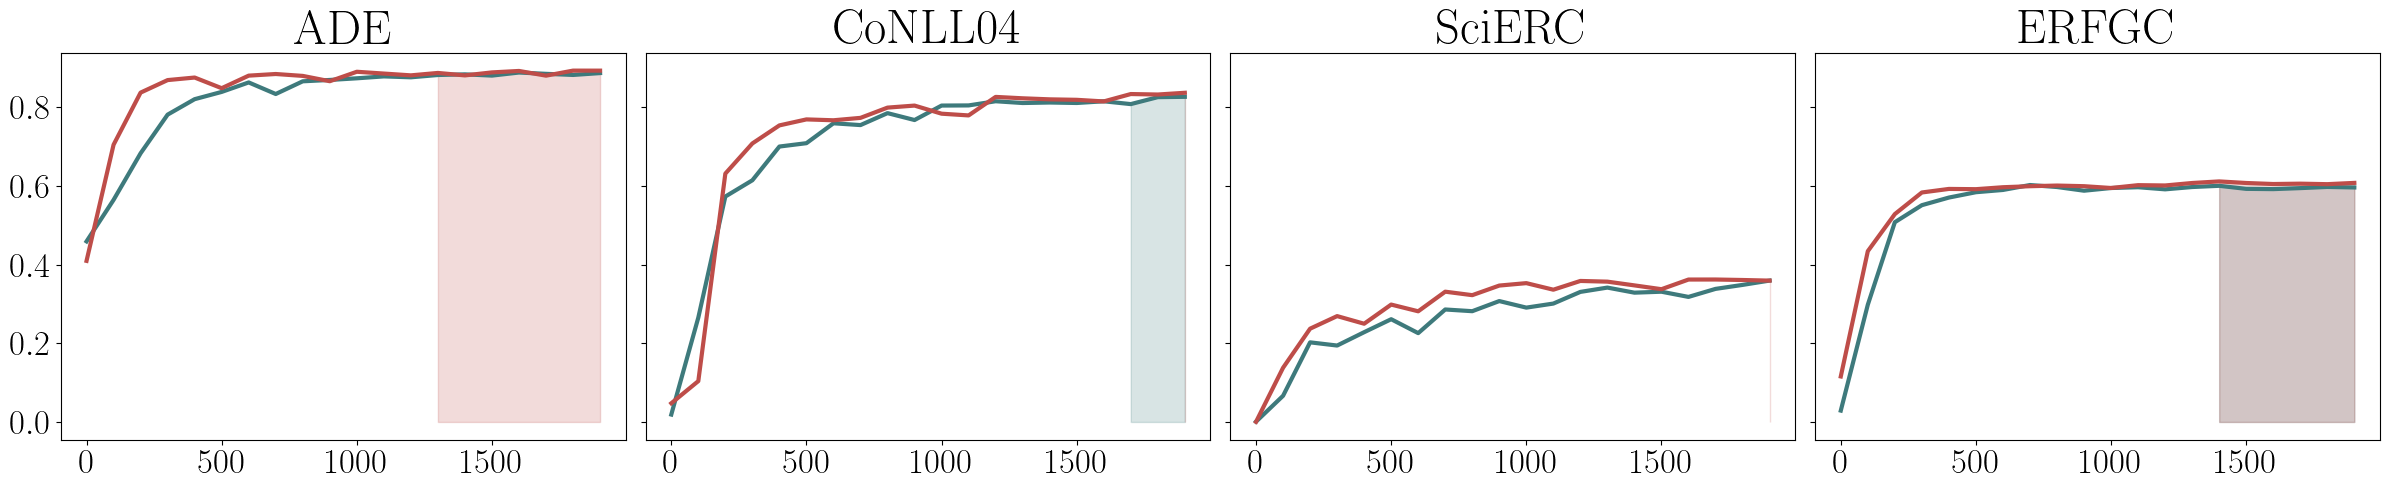

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman'],
})
paper_dir_best = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/paper'
walk_path_convergence = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_best'
entries = []
dataset_list = ['ade', 'conll04', 'scierc', 'yamakata']
for root, dirs, files in os.walk(walk_path_convergence):
    for F in files:
        filename = os.path.join(root, F)
        if filename.endswith('config.json'):
            config = json.load(open(os.path.join(root, 'config.json')))
            val_results_graph = json.load(open(os.path.join(root, 'val_results.json')))
            val_results = config['val_results']
            test_results = config['test_results']
            entries.append({
                'dataset_name': config['config']['dataset_name'],
                'arc_norm': config['config']['arc_norm'],
                'steps': [el['steps'] for el in val_results_graph],
                'f1': [el['parser_labeled_results']['F1'] for el in val_results_graph],
            })
# df_convergence = pd.DataFrame.from_records(entries)
# df_convergence#.groupby(by=['dataset_name', 'arc_norm'])
grouped_dict = {}
for dataset_name in dataset_list:
    for arc_opt in [0, 1]:
        grouped_dict[(dataset_name, arc_opt)] = []
length_list = []
for dataset_name in dataset_list:
    for arc_opt in [0, 1]:
        for entry in entries:
            if entry['dataset_name'] == dataset_name and entry['arc_norm'] == arc_opt:
                grouped_dict[(dataset_name, arc_opt)].append(entry['f1'])
                length_list.append(len(entry['f1']))

grouped_mean = {}
grouped_count = {}
# display(grouped_dict)
for key, value_list in grouped_dict.items():
    # build nan-padded array
    max_len = max(len(s) for s in value_list)
    arr = np.full((len(value_list), max_len), np.nan, dtype=float)
    for i, series in enumerate(value_list):
        arr[i, :len(series)] = series

    # mean & count
    grouped_mean[key]  = np.nanmean(arr, axis=0)
    grouped_count[key] = np.sum(~np.isnan(arr), axis=0)

fig, axes = plt.subplots(1, 4, figsize=(24, 5),
                         sharey=True,
                        #  sharex=True,
                         )
colors = ['#3E7A7C', '#BE4D49']
for idx, dataset in enumerate(dataset_list):
    ax = axes[idx]
    for arc_opt in [0, 1]:
        mean_s  = grouped_mean[(dataset, arc_opt)]
        count_s = grouped_count[(dataset, arc_opt)]
        idxs    = np.arange(len(mean_s))
        total_runs = count_s.max()

        ax.plot(idxs, mean_s, label=f"arc_norm={arc_opt}", linewidth = 3, color = colors[arc_opt])
        ax.fill_between(
            idxs,
            mean_s,
            where=(count_s < total_runs),
            alpha=0.2,
            label=f"Early stopping (arc_norm={arc_opt})",
            color = colors[arc_opt]
        )

    # ← only every 5th index (i.e. 500 steps) gets a tick
    tick_idxs = np.arange(0, len(idxs), 5)
    ax.tick_params(axis='both', labelsize=25)
    ax.set_xticks(tick_idxs)
    ax.set_xticklabels(tick_idxs * 100)

    ax.set_title(data_name_dict[dataset], fontsize=35)
    # ax.legend()

plt.tight_layout()
plt.savefig(os.path.join(paper_dir_best, 'convergence.pdf'), format='pdf')
plt.show()


# get Bhatt setting (original repo)

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/mtrfg_results_og_repo'
entries = []
metric_list = ['tagger_results', 'parser_labeled_results', 'parser_unlabeled_results',]
for root, dirs, files in os.walk(walk_path):
    for F in files:
        filename = os.path.join(root, F)
        if filename.endswith('config.json'):
            config = json.load(open(os.path.join(root, 'config.json')))
            # print(config)
            val_results = json.load(open(os.path.join(root, 'val_results_best.json')))
            test_results = json.load(open(os.path.join(root, 'test_results.json')))
            for metric in metric_list:
                entry = {
                "metric": metric,
                "arc_norm": config['arc_norm'],
                "val_p": val_results[metric]['P'],
                "val_r": val_results[metric]['R'],
                "val_f1": val_results[metric]['F1'],
                "test_p": test_results[metric]['P'],
                "test_r": test_results[metric]['R'],
                "test_f1": test_results[metric]['F1'],}
                entries.append(entry)
df_bhatt_og = pd.DataFrame.from_records(entries)
df_bhatt_og_group_p = df_bhatt_og.groupby(by=['metric', 'arc_norm'])['test_p'].agg(['mean', 'std']).reset_index()
df_bhatt_og_group_p = df_bhatt_og_group_p.round(3)

df_bhatt_og_group_p['combined'] = df_bhatt_og_group_p.apply(lambda row: f"{row['mean']} pm {row['std']}", axis= 1)
df_bhatt_og_group_p = df_bhatt_og_group_p.pivot(index='arc_norm', columns='metric', values=['combined'])
print('precision')
display(df_bhatt_og_group_p)
df_bhatt_og_group_r = df_bhatt_og.groupby(by=['metric', 'arc_norm'])['test_r'].agg(['mean', 'std']).reset_index()
df_bhatt_og_group_r = df_bhatt_og_group_r.round(3)

df_bhatt_og_group_r['combined'] = df_bhatt_og_group_r.apply(lambda row: f"{row['mean']} pm {row['std']}", axis= 1)
df_bhatt_og_group_r = df_bhatt_og_group_r.pivot(index='arc_norm', columns='metric', values=['combined'])
print('recall')
display(df_bhatt_og_group_r)
df_bhatt_og_group_f1 = df_bhatt_og.groupby(by=['metric', 'arc_norm'])['test_f1'].agg(['mean', 'std']).reset_index()
df_bhatt_og_group_f1 = df_bhatt_og_group_f1.round(3)

df_bhatt_og_group_f1['combined'] = df_bhatt_og_group_f1.apply(lambda row: f"{row['mean']} pm {row['std']}", axis= 1)
df_bhatt_og_group_f1 = df_bhatt_og_group_f1.pivot(index='arc_norm', columns='metric', values=['combined'])
print('f1')
display(df_bhatt_og_group_f1)

# get Bhatt setting (updated repo)

In [ ]:
df_bhatt = df_tagger
# df_bhatt['name'] = 'bert'
df_bhatt = df_bhatt[df_bhatt['par_rnn_l'] == 3]
df_bhatt = df_bhatt[df_bhatt['par_rnn_h'] == 400]
df_bhatt = df_bhatt[df_bhatt['mlp_h'] == 500]
df_bhatt = df_bhatt[df_bhatt['tag_emb'] == 1]
# df_bhatt = df_bhatt[df_bhatt['arc_norm'] == 0]
df_bhatt = df_bhatt.groupby(by=['data', 'arc_norm'])['test_f1'].agg(['mean', 'std']).reset_index()
print(len(df_bhatt))
df_bhatt = df_bhatt.round(3)
display(df_bhatt)
df_bhatt['F1'] = df_bhatt.apply(lambda row: f"${row['mean']}"+r"\pm "+f"{row['std']}$", axis= 1)
df_bhatt = df_bhatt.drop(['mean', 'std'], axis = 1)
df_bhatt.to_latex(os.path.join(paper_dir, f'bhatt_results.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Bhatt results.',
                            label=f'tab:bhatt-results',
                            )
display(df_bhatt)

# LoRA

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_steps_lora_ft'
df_aggregate_ft = load_results(walk_path)
dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata'
    ]

# for dataset in dataset_list:
    # df_aggregate_ft = df_aggregate_ft[df_aggregate_ft['data'] == dataset]
df_aggregate_ft = df_aggregate_ft[df_aggregate_ft['metric'] == 'parser_labeled_results']
df_aggregate_ft = df_aggregate_ft.sort_values(by='test_f1', ascending=False)
# df_aggregate_ft = df_aggregate_ft[df_aggregate_ft['par_rnn_l'] == 3]

# degrees of freedom
# print(df_aggregate_ft['tag_emb'].value_counts())
# print(df_aggregate_ft['arc_norm'].value_counts())
# print(df_aggregate_ft['freeze_enc'].value_counts())

display(df_aggregate_ft)

df_group = (
    df_aggregate_ft
    .groupby(['metric',
            'arc_norm',
            'tag_emb',
            # 'params',
            'data',
            'lora',
            ])['test_f1']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
)

df_group = df_group.sort_values(by=['tag_emb', 'arc_norm', 'data',])

# df_group = df_group[df_group['par_rnn_l'] == 3]
# df_group = df_group[df_group['arc_norm'] == 0]

df_group.to_latex(os.path.join(paper_dir, f'ft_lora_results.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Full fine-tuning and LoRA results.',
                            label=f'tab:full-ft-lora-results',
                            )
display(df_group)

# GNN results

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/resultstagger_gnn_xu'
df_aggregate_gnn = load_results(walk_path)
df_aggregate_gnn = df_aggregate_gnn[df_aggregate_gnn['metric'] == 'parser_labeled_results']
df_aggregate_gnn = df_aggregate_gnn[df_aggregate_gnn['data'] == 'yamakata']
# print(df_aggregate_gnn['freeze_enc'].describe())
# print(df_aggregate_gnn['seed'].value_counts())
display(df_aggregate_gnn)
df_group_gnn = df_aggregate_gnn.groupby(by = ['data',
                                              'par_rnn_l',
                                              'par_rnn_h',
                                              'mlp_h',
                                              'par_gnn_layers',
                                              'arc_norm'
                                              ])['test_f1'].agg(['mean', 'std']).reset_index()
df_group_gnn.sort_values(['par_rnn_l', 'par_gnn_layers'])

# LSTM complete results

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations'
df_no_tagger = load_results(walk_path)
display(df_no_tagger)
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations_tagger_rnn'
df_tagger = load_results(walk_path)
df_tagger = df_tagger[df_tagger['tag_rnn'] == 1]
display(df_tagger)

In [ ]:
def ppp(x):
    print(x)
    return x

tag_emb_opts = (0, 1)
df_list = [df_tagger]
for df in df_list:
    for tag_emb_option in tag_emb_opts:
        df_no_tagger_filtered = df[df['tag_emb'] == tag_emb_option]
        # display(df_no_tagger_filtered)
        # df_no_tagger_group_data = df_no_tagger_filtered.groupby(by=[
        #                         'metric',
        #                         # 'data',
        #                         'tag_emb',
        #                         'par_rnn_l',
        #                         'par_rnn_h',
        #                         'mlp_h',
        #                         'arc_norm',
        #                         ],)['test_f1'].agg(['mean', 'std']).reset_index()
        # df_no_tagger_group_data = df_no_tagger_group_data.sort_values('mean')
        # display(df_no_tagger_group_data)
        df_no_tagger_group = df_no_tagger_filtered.groupby(by=[
                                'metric',
                                'data',
                                'tag_emb',
                                'par_rnn_l',
                                'par_rnn_h',
                                'mlp_h',
                                'arc_norm',
                                ],)['test_f1'].agg(['mean', 'std']).reset_index()

        df_no_tagger_group['mean_std'] = df_no_tagger_group.apply(
                lambda row: f"{row['mean']:.3f} ± {row['std']:.3f}", axis=1
            )
        # df_no_tagger_group = df_no_tagger_group.drop(['mean', 'std'], axis=1)
        df_no_tagger_group

        tag_emb_flag = df_no_tagger_filtered['tag_emb'].unique()[0]
        tag_rnn_flag = df_no_tagger_filtered['tag_rnn'].unique()[0]

        pivot_df = df_no_tagger_group.pivot(
            values=[
                    # 'mean_std',
                    'mean',
                    # 'std',
                    ],
            index=['arc_norm',
                    'par_rnn_l',
                    'metric',
                    'tag_emb',
                    'par_rnn_h',
                    'mlp_h',
                    ],
            columns='data'
        ).reset_index()
        display(pivot_df)
        
        # pivot_df['overall_mean'] = pivot_df.apply(lambda row: ppp(row))
        
        # pivot_df.to_latex(os.path.join(paper_dir, f'lstm_results_complete_tagemb-{tag_emb_flag}_tagrnn-{tag_rnn_flag}.tex'),
        #                             float_format='%.3f',
        #                             escape=True,
        #                             # index=False,
        #                             caption=f'Complete LSTM results - tagemb-{tag_emb_flag} - tagrnn-{tag_rnn_flag}.',
        #                             label=f"tab:lstm-results-complete_tagemb-{tag_emb_flag}_tagrnn-{tag_rnn_flag}",
        #                             )